In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


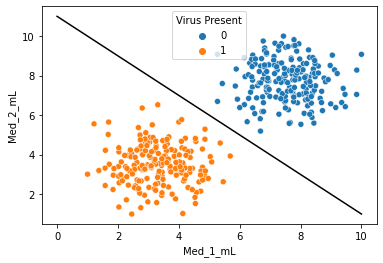

In [4]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

# Building the hyperplan(2d line)
x = np.linspace(0,10,100)
m = -1 # slope
b = 11 # coefficient
y = m*x + b

plt.plot(x,y,'black')

In [7]:
from sklearn.svm import SVC

y = df['Virus Present']
X = df.drop(columns='Virus Present')

model = SVC(kernel='linear', C=1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [8]:
from svm_margin_plot import plot_svm_boundary

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


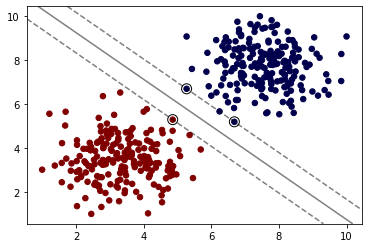

In [9]:
plot_svm_boundary(model,X,y)

In [12]:
model = SVC(kernel='linear', C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


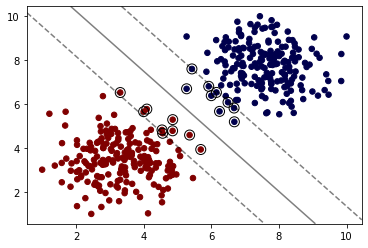

In [13]:
plot_svm_boundary(model,X,y)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


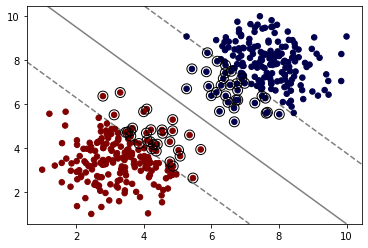

In [15]:
model = SVC(kernel='linear', C=0.005)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


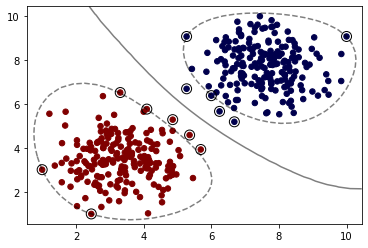

In [16]:
model = SVC(kernel='rbf', C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


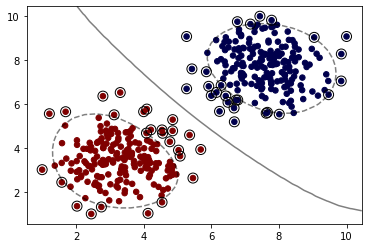

In [18]:
model = SVC(kernel='rbf', C=0.1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


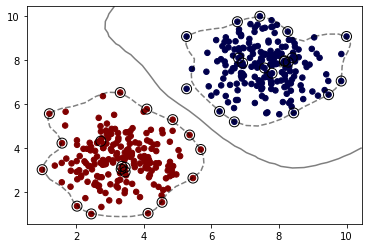

In [19]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


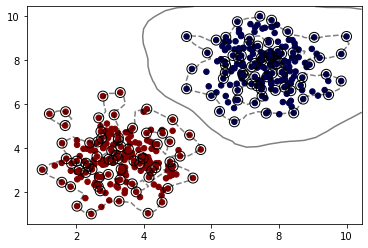

In [20]:
model = SVC(kernel='rbf', C=1, gamma=2)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


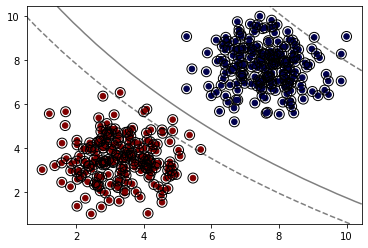

In [22]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


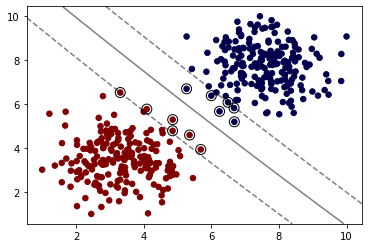

In [28]:
model = SVC(kernel='poly', degree=2, C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
svm = SVC()
param_grid = {
    'C' : [0.01, 0.1, 1],
    'kernel' : ['linear', 'rbf']
}

In [31]:
grid = GridSearchCV(svm, param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [32]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# SVM in Linear Regression

In [34]:
df = pd.read_csv('../DATA/cement_slump.csv')
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


<AxesSubplot:>

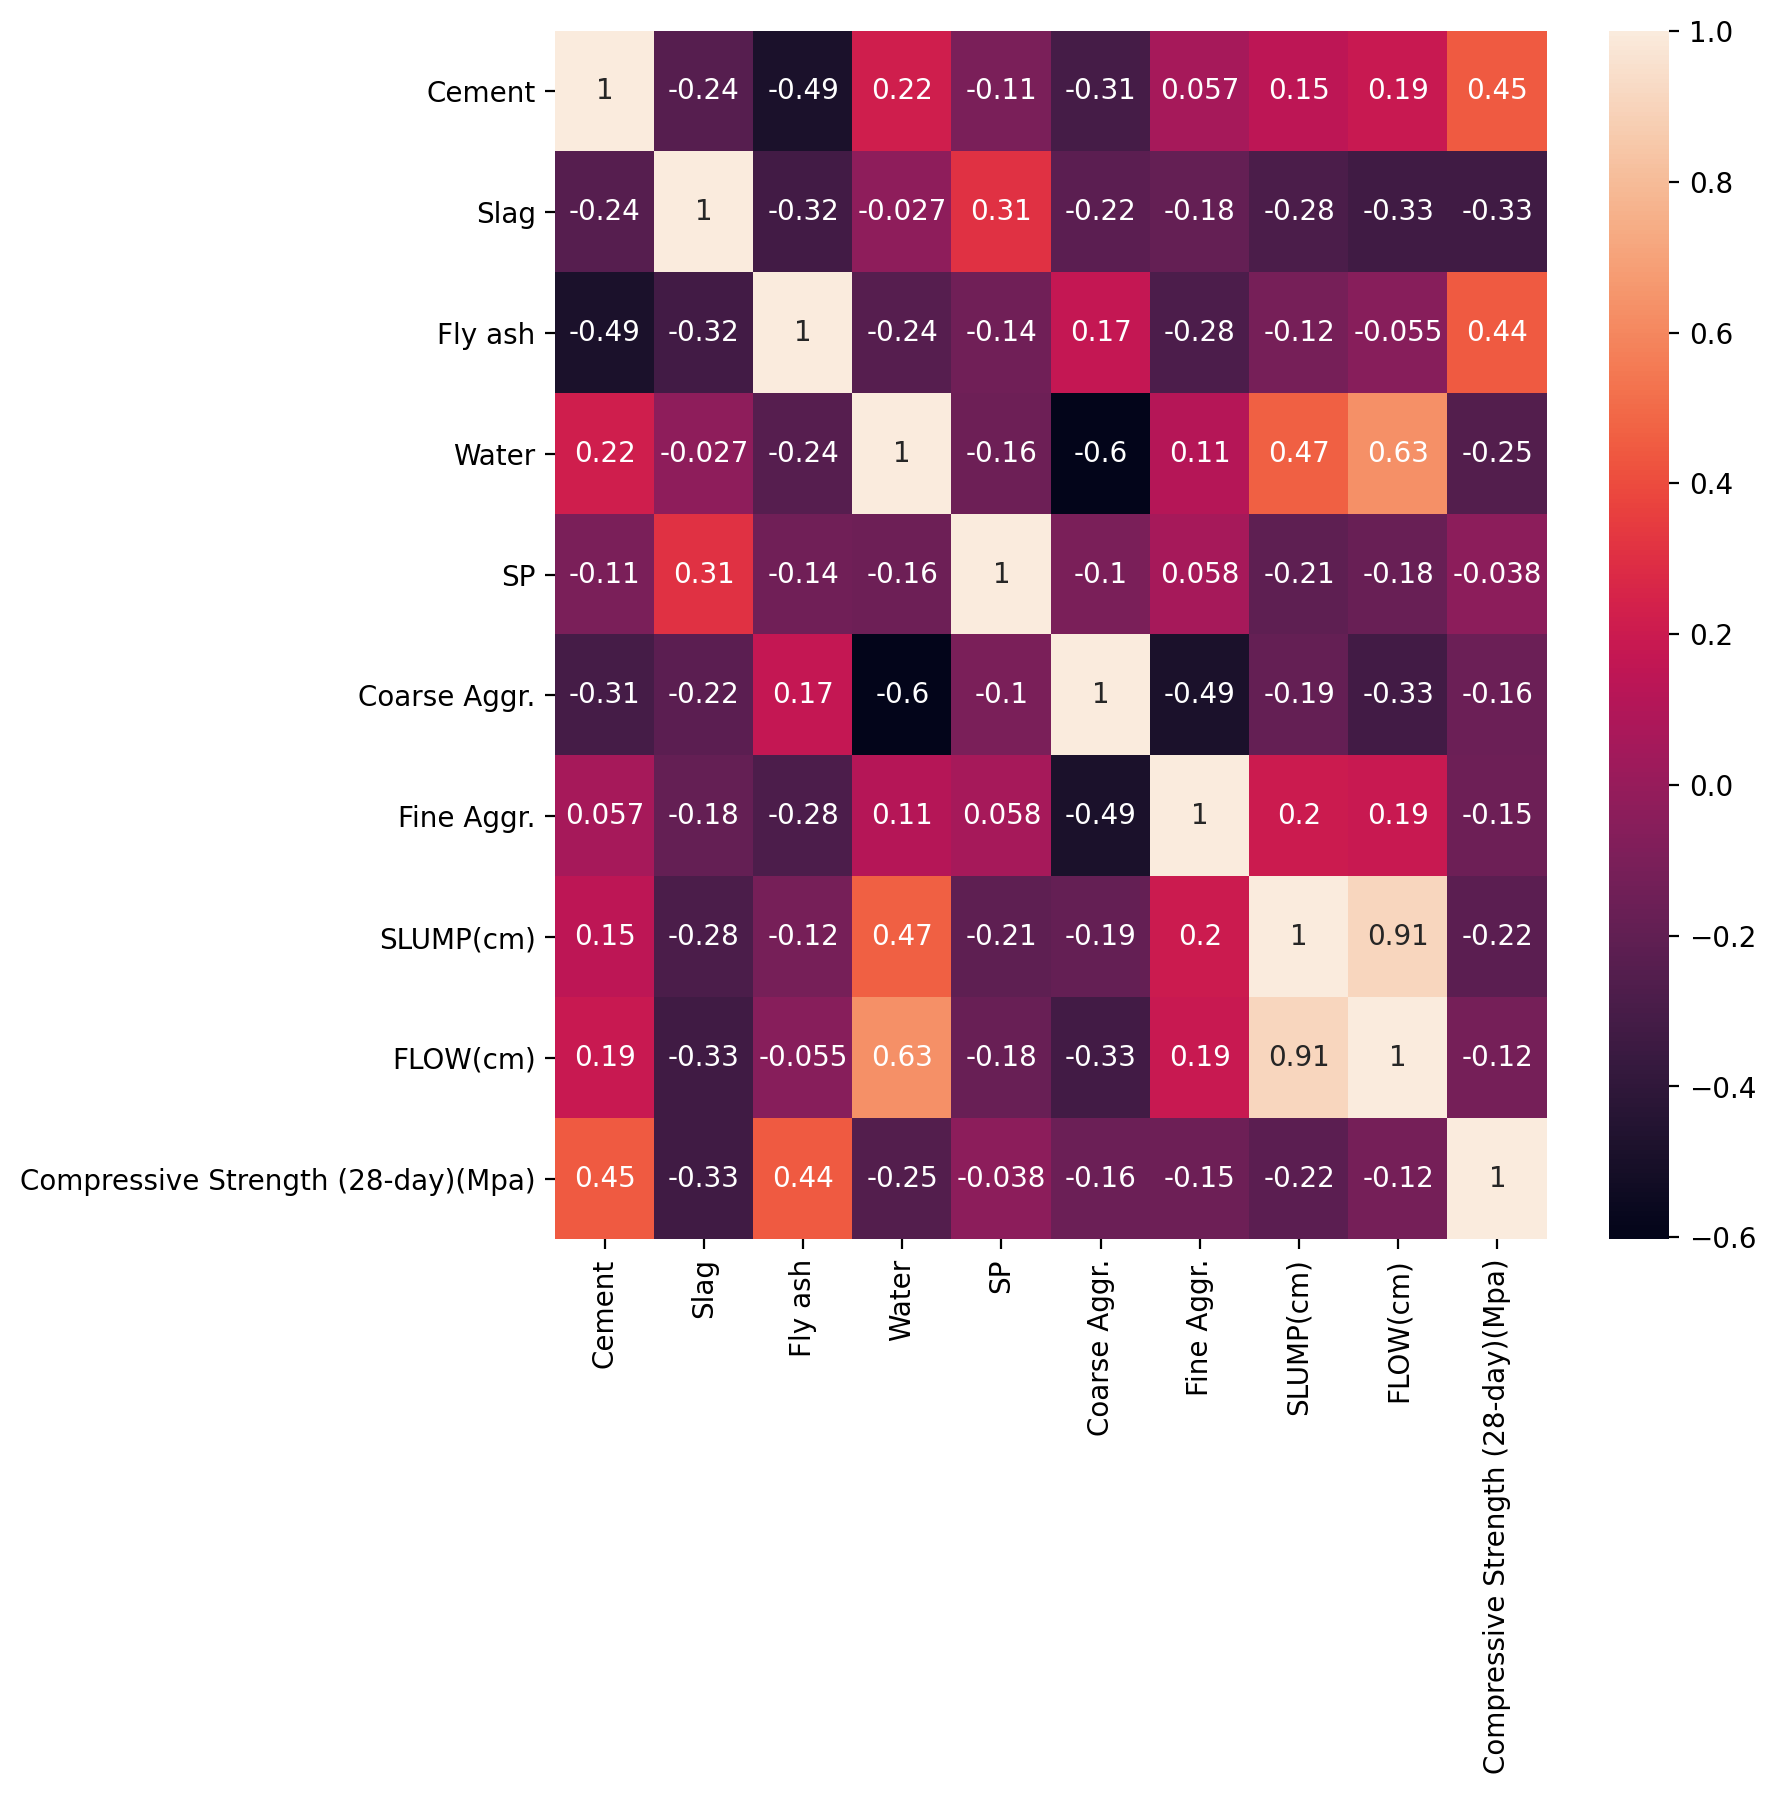

In [36]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [40]:
X = df.drop(columns='Compressive Strength (28-day)(Mpa)')
y = df['Compressive Strength (28-day)(Mpa)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
from sklearn.svm import SVR, LinearSVR

base_model = SVR()
base_model.fit(scaled_X_train, y_train)
base_preds = base_model.predict(scaled_X_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, base_preds)

5.236902091259179

In [48]:
mean_squared_error(y_test, base_preds, squared=False)

6.695914838327133

In [50]:
y_test.mean()

36.26870967741935

In [52]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {
    'C': [0.001,0.01,0.1,0.5,1],
    'kernel' : ['linear', 'rbf', 'poly'],
    'gamma' : ['scaled', 'auto'],
    'degree' : [2,3,4],
    'epsilon' : [0,0.01,0.1,0.5,1,2]
}

In [53]:
svr = SVR()
grid = GridSearchCV(svr,param_grid)

grid.fit(scaled_X_train, y_train)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got ''scaled'' instead.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\Guilherm

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scaled', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [54]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'}

In [55]:
grid_preds = grid.predict(scaled_X_test)

In [56]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [57]:
mean_squared_error(y_test,grid_preds,squared=False)

3.1782103051198347